In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
from google.colab import files
iploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
#musk=pd.read_csv("Elon_musk.csv")
musk = pd.read_csv("Elon_musk.csv", encoding="latin-1")
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [4]:
# Checking for null values
musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [5]:
# Checking for duplicates
musk.duplicated().sum()

0

In [6]:
# Removing Unnamed column
musk.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [8]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [9]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [11]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
# Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation))
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [13]:
# Install the required module
!pip install nltk

In [14]:
# Import the required modules
import nltk
from nltk.tokenize import word_tokenize

# Download the required NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Tokenization
text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [16]:
len(text_tokens)

21373

In [17]:
!pip install nltk

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [21]:
# Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [22]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [23]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [24]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [25]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


In [26]:
#Feature Extraction :

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [28]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2695    231         2433  3615   4493        959  1670       3150   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1665  4528  ...  1075      3504     4248        3540    4031   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2325    773     3816    1525    247  

[1 rows x 4965 columns]

In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2695
alien                231
idaacarmack         2433
ray                 3615
trace               4493
...                  ...
httpstcowjrzibkh1h  2325
click                773
samwise             3816
gamgee              1525
altho                247

[4965 rows x 1 columns]

In [30]:

pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
ðogecoin         4964
zzcool           4963
zwiebelbach      4962
zubinanary       4961
zshauladventure  4960
zone             4959
zon              4958
zogfotpik        4957
zip2             4956
zikryzamir       4955
zero             4954
zenit            4953
zeitmas          4952
zealand          4951
zainraz4         4950
yup              4949
ystijd           4948
youyanggu        4947
yourfavgas       4946
youranonnews     4945
youranonnew      4944
your             4943
young            4942
younesh1989      4941
you              4940
york             4939
yolt             4938
yoda             4937
yo               4936
yet              4935

In [31]:

pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
005             0
10              1
100             2
1000            3
10000           4
107             5
10x             6
11              7
112             8
11thhour        9
12             10
122            11
13             12
130pm          13
13arm13arm     14
13ericralph31  15
14             16
140pm          17
149watt        18
14yearold      19
15             20
150            21
155            22
16             23
162            24

In [32]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 231, 'idaacarmack': 2433, 'ray': 3615, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1670, 'nextlevel': 3150, 'have': 1665, 'try': 4528, 'joerogan': 2615, 'spotify': 4111, 'great': 1604, 'interview': 2544, 'gtera27': 1623, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2715, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1652, 'new': 3146, 'ox': 3307, 'httpstco9wfkmyu2oj': 1860, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1716, 'httpstcozgxjfdzzrm': 2393, 'owensparks': 3304, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1637, 'thanks': 4376, 'indeed': 2482, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3284, 'likely': 2776, 'givedirectly': 1574, 'just': 2642, 'send': 3884, 'agree': 200, 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# prompt: Fit the vectorizer

vectorizer.fit(lemmas)


CountVectorizer()

In [35]:
vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()




In [36]:
vectorizer.fit(lemmas)

CountVectorizer()

In [37]:
if 'vectorizer_ngram_range' in globals():
    print("Variable 'vectorizer_ngram_range' exists.")
else:
    print("Variable 'vectorizer_ngram_range' does not exist.")

Variable 'vectorizer_ngram_range' does not exist.


In [42]:
if 'vectorizer_ngram_range' in globals():
    print(f"Type of 'vectorizer_ngram_range': {type(vectorizer_ngram_range)}")

In [51]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [40]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
print(X.toarray().shape)

(16023, 4965)


In [44]:
#Let's see how can bigrams and trigrams can be included here

In [45]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [50]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [47]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
#TFidf vectorizer :

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [52]:
print(vectorizer_n_gram_max_features.get_feature_names_out())


['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [53]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.38777203]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [54]:
#Generate wordcloud :
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    # Set figure size
    plt.imshow(wordcloud)           # Display image
    plt.axis("off")                 # No axis details

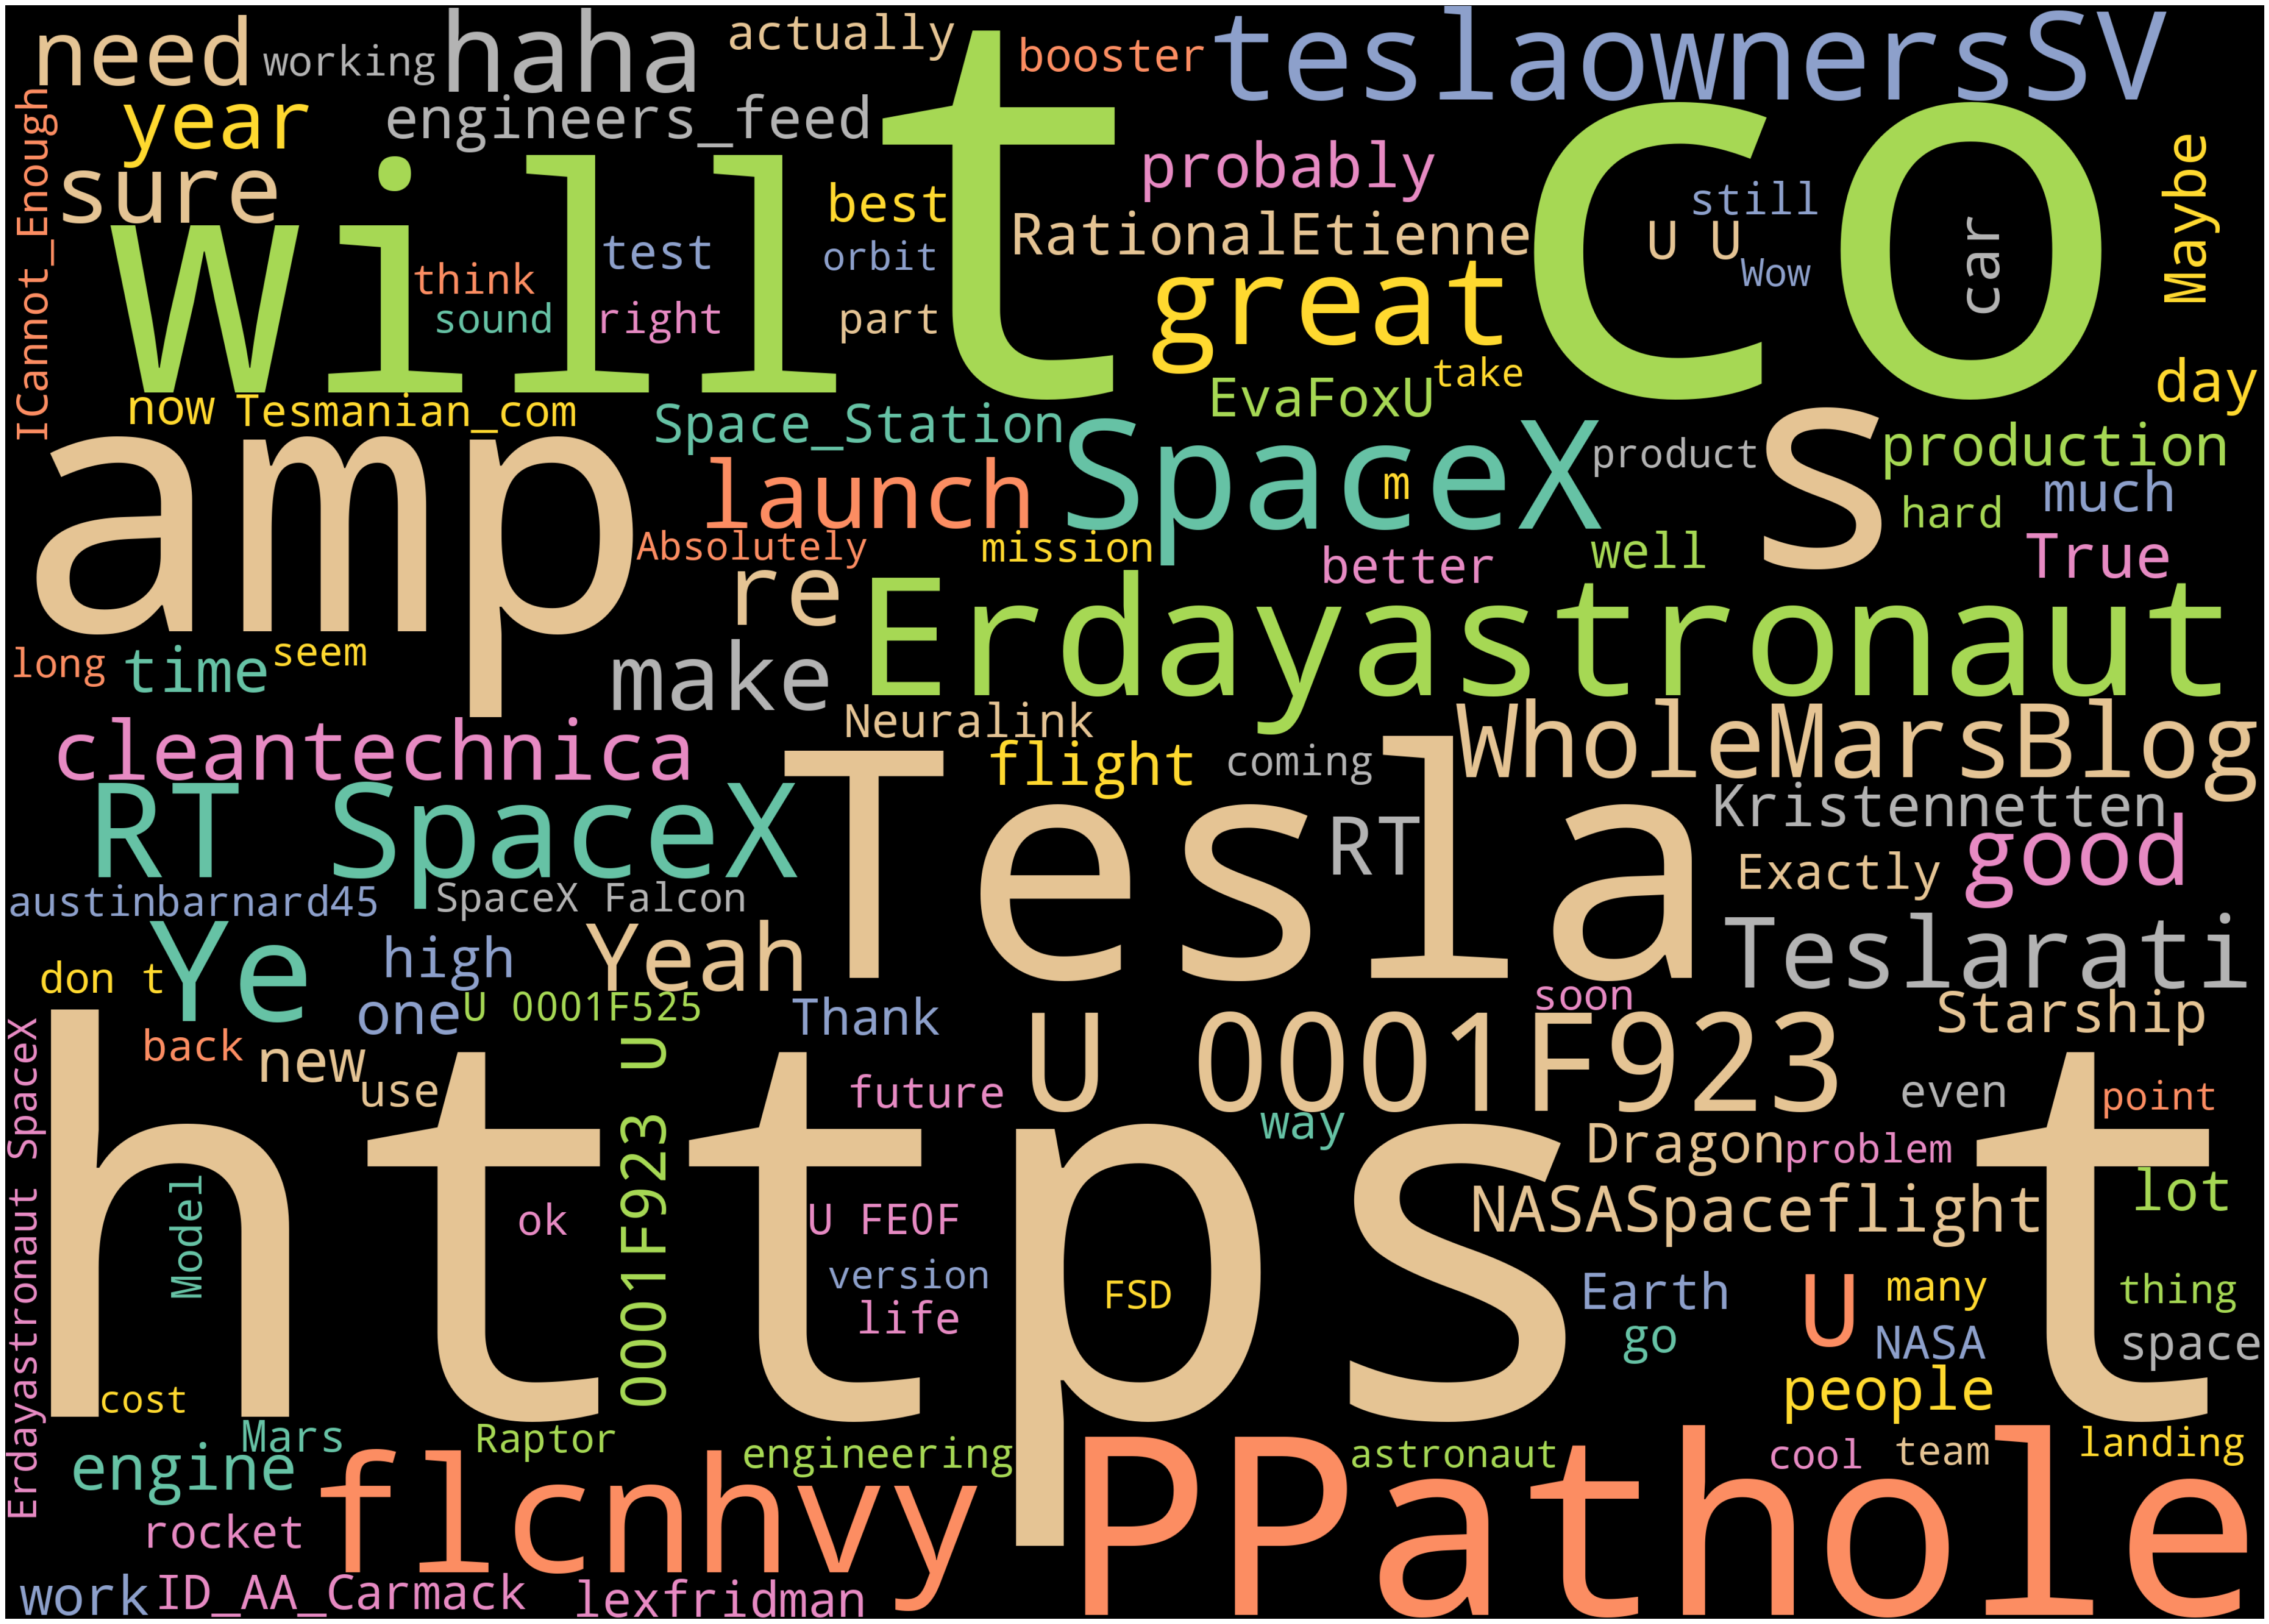

In [55]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [56]:
from google.colab import files
iploaded=files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [58]:
musk2 = pd.read_csv("Elon_musk.csv", encoding="latin-1")
musk2

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [59]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [60]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [61]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [62]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [63]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [64]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [65]:
len(nouns_verbs)

3

In [66]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [67]:
X.shape

(3, 3)

In [68]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [69]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [70]:
pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))


level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1

In [71]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]])

In [72]:
type(sum_words)

numpy.matrix

In [73]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [74]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
!pip install pandas
!pip install scikit-learn

In [76]:
cv = CountVectorizer()

In [77]:
data = ['This is the first document.', 'This is the second document.']
cv.fit(data)
feature_names = cv.get_feature_names_out()

In [78]:
print(len(sum_words))
print(len(cv.get_feature_names_out()))

1
6


In [79]:
print(type(sum_words))
print(sum_words.shape)

<class 'numpy.matrix'>
(1, 3)


In [80]:
if len(sum_words.shape) :
    sum_words = sum_words.flatten()

In [100]:
import pandas as pd

# Create a CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(musk2)

# Get feature names and word counts
feature_names = cv.get_feature_names_out()
sum_words = X.sum(axis=0).tolist()[0]


In [105]:
if len(cv.get_feature_names_out()) == len(sum_words):
    # Create DataFrame
    wf_df = pd.DataFrame({'word': cv.get_feature_names_out(), 'count': sum_words})
else:
    print("Error: Lengths of 'word' and 'count' arrays are not the same.")

In [106]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : sum_words})
wf_df

word  count
0            000      6
1       0001f1e6      2
2       0001f1e7      1
3       0001f1e8      2
4       0001f1e9      4
...          ...    ...
5448  zyf8efd6ih      1
5449  zyj8zddfql      1
5450  zynsxisp4n      1
5451      zzcool      1
5452    ðogecoin      1

[5453 rows x 2 columns]

<Axes: title={'center': 'verbs and nouns'}, xlabel='word'>

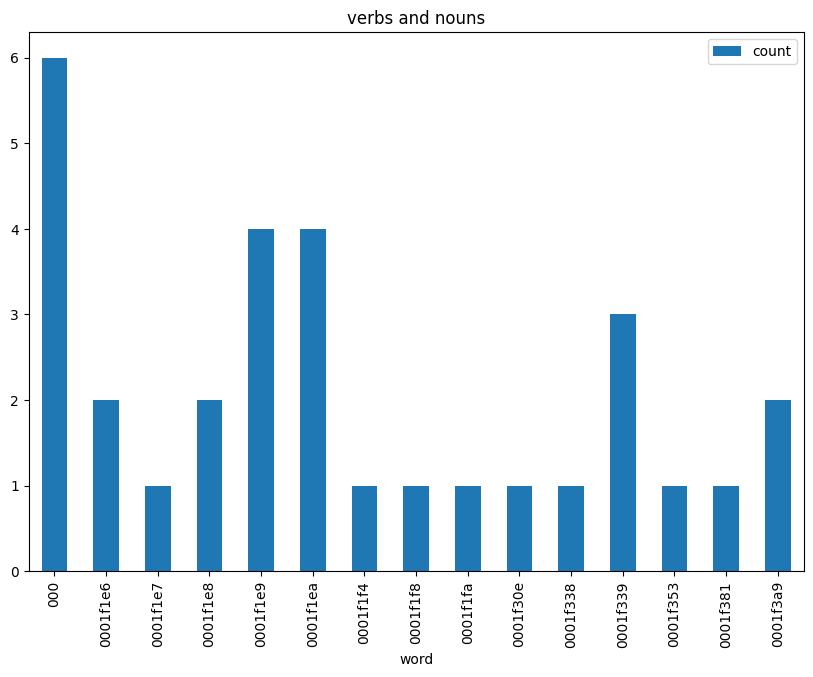

In [107]:
#Visualizing results :
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='verbs and nouns')

In [155]:
#Emotion Mining :
#Sentiment analysis
from google.colab import files
iploaded=files.upload()

Saving kri.csv to kri.csv


In [164]:
data= pd.read_csv('kri.csv', encoding=encoding)
data.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [165]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [166]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

In [167]:
import pandas as pd
data = pd.DataFrame(data)
affinity_scores = data.set_index('word')['value'].to_dict()

In [169]:
'word' in data.columns

True

In [170]:
affinity_scores = data.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [171]:
nlp = spacy.load('en_core_web_sm')


In [172]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [173]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [174]:

calculate_sentiment(text = 'wonderful session')

4

In [175]:

calculate_sentiment(text = 'great job, best explanation ever')

6

In [176]:

calculate_sentiment(text = 'good')

3

In [177]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [178]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [179]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [180]:
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
922  @kenyanwalstreet Not actually a payout, just a...                0
923  It may never pay out, as the stock cant b
 ht...               -4
924                                    Details Aug 28.                0
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[927 rows x 2 columns]

In [182]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [183]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
922          11  
923          31  
924           3  
925          47  
926          15  

[927 rows x 3 columns]

In [184]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
226  @PPathole @karpathy For a second there, I thou...               11   
161  @harsimranbansal @heydave7 It will most likely...               11   
820  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
186  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
722  We just havent observed the
 https://t.co/mez...               17   

     word_count  
226          69  
161          93  
820          72  
186          98  
81           38  
648          65  
588         138  
105          94  
36          231  
722          72

In [185]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
923  It may never pay out, as the stock cant b
 ht...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
614  Then static fire, checkouts, static fire, fly ...               -4   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
235  @RationalEtienne @MarcusHouseGame Not yet @Sta...               -3   
222  External
 https://t.co/csIZk6sEVu @bcart03 @ne...               -3   
221  @RGVaerialphotos It will be real soon @MarcusH...               -3   
218  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
633                        You are a modern day moron.               -3   
721  That bs has been pushed by Eberhard (worst per...               -3   
732                                    Those worry me.               -3   
747  @TimFernholz So why is this madness acceptable...               -3   

     word_count  
840          61  
650          60  
64           11  
923          31  
683          39  
614          12  
23           37  
235           8  
222          31  
221          18  
218         129  
633           6  
721          25  
732           3  
747          10

In [186]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [187]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   

   word_count  
0          13  
1           4  
4           8  
5           6  
6          14

In [188]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
64   Also, the road to hell is mostly paved with ba...               -7   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   

     word_count  
64           11  
650          60  
840          61

In [189]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
650    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
840    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [190]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [191]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [192]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

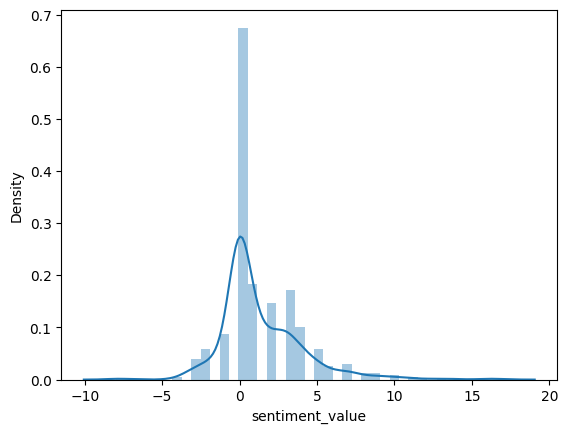

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

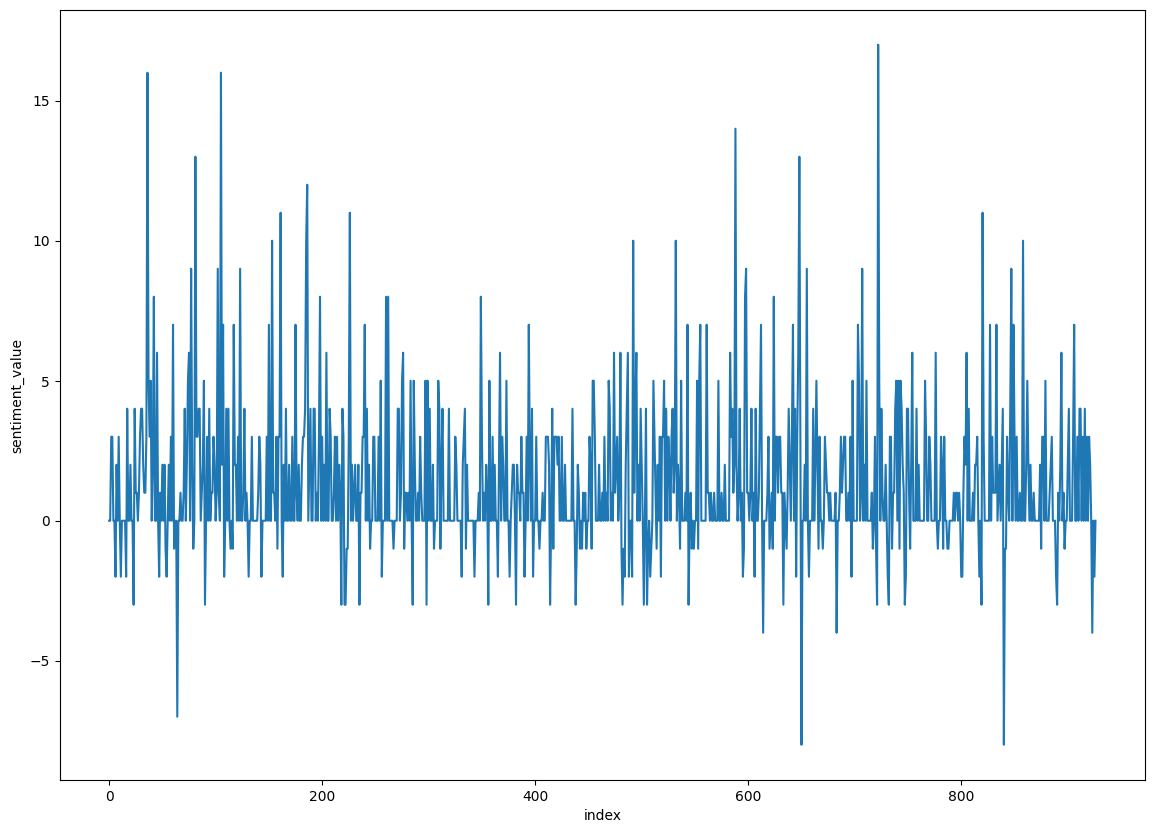

In [194]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

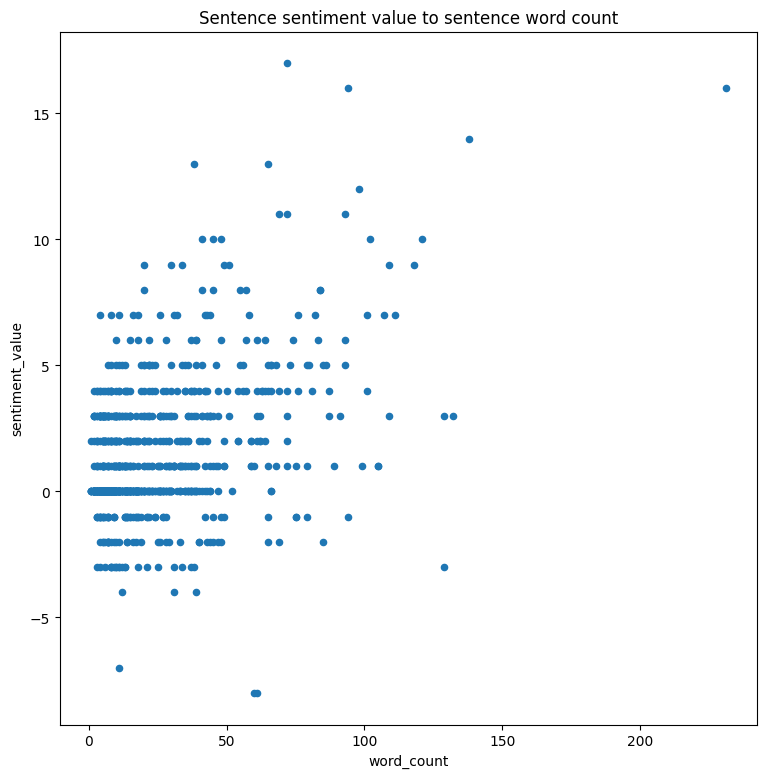

In [195]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

#POS for positive words
# NEG for Negative Words

In [196]:
#

In [502]:
import chardet

In [503]:
from google.colab import files
uploaded=files.upload()

Saving negative-words (1).txt to negative-words (1) (2).txt


In [504]:
!pip install pandas
import pandas as pd

In [505]:
with open('negative-words (1).txt', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
    !head -n 10 negative-words.txt

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:


In [506]:
# Get the file name
NEG = list(uploaded.keys())[0]

# Display the uploaded file name
print(f"Uploaded file: {NEG}")

Uploaded file: negative-words (1) (2).txt


In [492]:
from google.colab import files
Uploaded=files.upload()

Saving positive-words.txt to positive-words (6).txt


In [507]:
with open('positive-words.txt', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
    !head +p 10 positive-words.txt

head: cannot open '+p' for reading: No such file or directory
head: cannot open '10' for reading: No such file or directory
==> positive-words.txt <==
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:


In [508]:
# Get the file name
POS = list(uploaded.keys())[0]

# Display the uploaded file name
print(f"Uploaded file: {POS}")

Uploaded file: negative-words (1) (2).txt


In [509]:
POS= pd.DataFrame(POS.split('\n'),columns=['Words'])
POS


Words
0  negative-words (1) (2).txt

In [510]:
NEG = pd.DataFrame(NEG.split('\n'),columns=['Words'])

In [520]:
!ls positive-words.txt
!head positive-words.txt

positive-words.txt
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:


In [522]:
# prompt: POS

print(POS)


Empty DataFrame
Columns: [Words, Score]
Index: []


In [523]:
POS =POS.iloc[25:]
POS =POS.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
POS.reset_index(inplace=True)
POS =POS.drop('index',axis=1)
POS['Score'] = 1
POS

Empty DataFrame
Columns: [Words, Score]
Index: []

In [524]:
POS.info()
NEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Words   0 non-null      object
 1   Score   0 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 124.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Words   0 non-null      object
 1   Score   0 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 124.0+ bytes


In [525]:
NEG = NEG.iloc[25:]
NEG = NEG.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NEG.reset_index(inplace=True)
NEG = NEG.drop('index',axis=1)
NEG['Score'] = -1
NEG

Empty DataFrame
Columns: [Words, Score]
Index: []

In [517]:
affinity_scores1 = POS.set_index('Words')['Score'].to_dict()
affinity_scores2 = NEG.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{}

In [462]:
!pip install spacy
import spacy

In [465]:
nlp = spacy.load("en_core_web_sm")

In [468]:
# calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [469]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [447]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                0   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...                0   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
922          11    922  
923          31    923  
924           3    924  
925          47    925  
926          15    926  

[927 rows x 4 columns]

In [448]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                0   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...                0   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
922          11    922  
923          31    923  
924           3    924  
925          47    925  
926          15    926  

[927 rows x 4 columns]

In [449]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
313  @teslaownerssv Cool, but please be super cauti...                0   
314                Expect two steps forward, one back.                0   
315                        Lot of new code was merged.                0   
317                                We can buff it out.                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
313           7    313  
314           6    314  
315           6    315  
317           5    317  
926          15    926

In [450]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
610  @PPathole @_rykllan @FelixSchlang @spaceXcentr...                0   
611         One way or another, excitement guaranteed!                0   
612  Support of greater Boca, Padre, Brownsville co...                0   
613  SN8 Starship with flaps &amp; nosecone should ...                0   

     word_count  index  
0            13      0  
610          42    610  
611           6    611  
612          11    612  
613          13    613

In [451]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    927.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sentiment_value, dtype: float64

In [459]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

Empty DataFrame
Columns: [sentence, sentiment_value, word_count, index]
Index: []

In [453]:
sent_df[sent_df['sentiment_value']<-1]

Empty DataFrame
Columns: [sentence, sentiment_value, word_count, index]
Index: []

In [454]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

Series([], Name: sentence, dtype: object)

In [455]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

[]

In [456]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

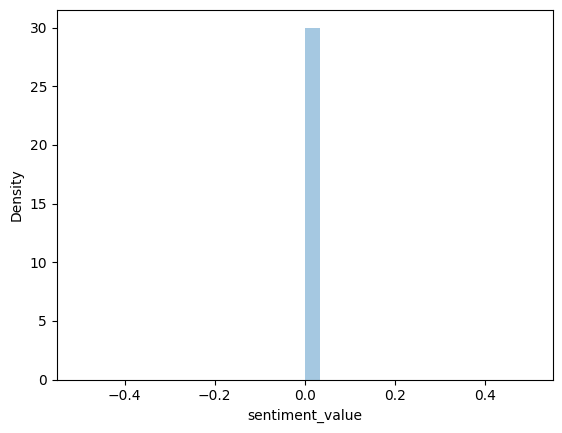

In [457]:
sns.distplot(sent_df['sentiment_value'])

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

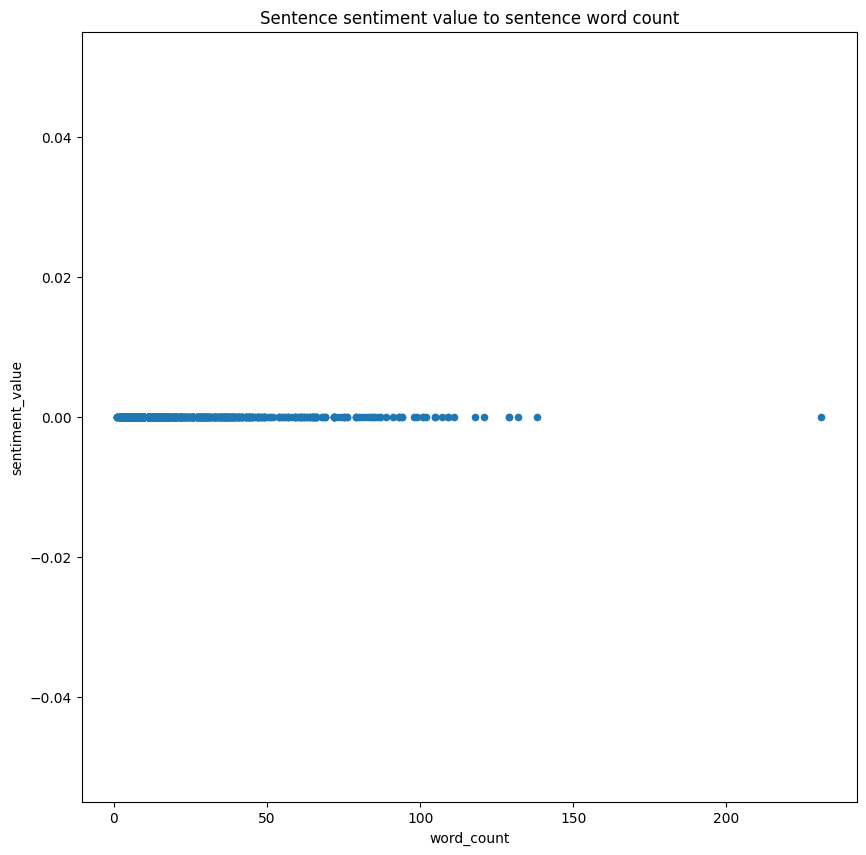

In [415]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')